<a href="https://colab.research.google.com/github/hanieljacob/Titanic/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
from sklearn.linear_model import LogisticRegression;

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
first_col = df2['PassengerId']
df1 = df1.drop(['PassengerId','Name','Ticket','Fare','Embarked'],axis=1)
df2 = df2.drop(['PassengerId','Name','Ticket','Fare','Embarked'],axis=1)
first_col

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

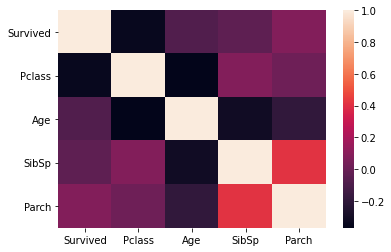

In [ ]:
#sns.pairplot(df1)
sns.heatmap(df1.corr())

In [ ]:
y = df1['Survived']
df1["Sex"] = df1["Sex"].astype('category')
df1["Cabin"] = df1["Cabin"].astype('category')
df1["Sex"] = df1["Sex"].cat.codes
df1["Cabin"] = df1["Cabin"].cat.codes
df2["Sex"] = df2["Sex"].astype('category')
df2["Cabin"] = df2["Cabin"].astype('category')
df2["Sex"] = df2["Sex"].cat.codes
df2["Cabin"] = df2["Cabin"].cat.codes
df1 = df1.drop(['Survived'],axis=1)

In [ ]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())
df2['Age'] = df1['Age'].fillna(df1['Age'].median())
clf = LogisticRegression(random_state=0).fit(df1, y)
pred = clf.predict(df2)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
 final = pd.DataFrame({'PassengerId': first_col,
                       'Survived': pred})
final.to_csv('my_submission.csv', index=False)